# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [5]:
# Write your code here
import pandas as pd
data= pd.read_csv("Product.csv")
data




,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,US,44834233,R366C7ARIWLN7R,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,US,13376158,R35PL0AOCUXLU9,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,US,40485963,R18ZJVY86AUFII,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,US,33485035,R36QVLQXMCZRSJ,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1


In [7]:
import pandas as pd
from collections import defaultdict

# Step 1: Read the CSV file
df = pd.read_csv('Product.csv')

# Function for text cleaning (Step 2)
def clean_text(text):
    text = ''.join([char.lower() for char in text if char.isalpha() or char.isspace()])
    text = ' '.join(text.split())
    return text

# Apply text cleaning to the review_body column
df['cleaned_review_body'] = df['review_body'].apply(clean_text)

# Function to generate n-grams (Used in Step 3 and 4)
def generate_ngrams(text, n=3):
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to calculate n-gram frequencies (Step 3)
def calculate_ngram_frequencies(reviews, n=3):
    frequency_dict = defaultdict(int)
    for review in reviews:
        ngrams = generate_ngrams(review, n)
        for ngram in ngrams:
            frequency_dict[ngram] += 1
    return frequency_dict

# Calculate 3-gram and bigram frequencies
three_gram_frequencies = calculate_ngram_frequencies(df['cleaned_review_body'], 3)
bigram_frequencies = calculate_ngram_frequencies(df['cleaned_review_body'], 2)

# Calculate word frequencies for bigram probability calculations (Step 4)
word_frequencies = calculate_ngram_frequencies(df['cleaned_review_body'], 1)

# Calculate bigram probabilities
bigram_probabilities = {}
for bigram, freq in bigram_frequencies.items():
    word1 = bigram.split()[0]
    bigram_probabilities[bigram] = freq / word_frequencies[word1]

# Simplified noun phrase extraction and probability calculation (Step 5)
# We use bigram frequencies as a proxy for noun phrases in this simplified example
max_noun_phrase_freq = max(bigram_frequencies.values())
noun_phrase_relative_probs = {bigram: freq / max_noun_phrase_freq for bigram, freq in bigram_frequencies.items()}

# Outputs (these would normally be saved or further processed)
# For demonstration, you would print or examine these variables directly
print(list(three_gram_frequencies.items())[:10])
print(list(bigram_probabilities.items())[:10])
print(list(noun_phrase_relative_probs.items())[:10])


[('great love it', 27), ('lots of adsbr', 1), ('of adsbr slow', 1), ('adsbr slow processing', 1), ('slow processing speedbr', 1), ('processing speedbr occasionally', 1), ('speedbr occasionally shuts', 1), ('occasionally shuts down', 1), ('shuts down appsbr', 1), ('down appsbr wifi', 1)]
[('great love', 0.006194081211286993), ('love it', 0.4687299697829869), ('lots of', 0.8759398496240601), ('of adsbr', 9.340556697179151e-05), ('adsbr slow', 0.16666666666666666), ('slow processing', 0.01256281407035176), ('processing speedbr', 0.04), ('speedbr occasionally', 0.3333333333333333), ('occasionally shuts', 0.018518518518518517), ('shuts down', 0.3620689655172414)]
[('great love', 0.008790779449111155), ('love it', 1.0), ('lots of', 0.04551670248095331), ('of adsbr', 0.0001953506544246923), ('adsbr slow', 0.0001953506544246923), ('slow processing', 0.0009767532721234617), ('processing speedbr', 0.0003907013088493846), ('speedbr occasionally', 0.0001953506544246923), ('occasionally shuts', 0.0

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
# Write your code here
import pandas as pd
from collections import defaultdict
import math

# Assuming the previous steps have been correctly implemented, including reading the CSV and text cleaning

# Calculate TF for each document
def calculate_tf(document):
    tf_dict = defaultdict(int)
    words = document.split()
    word_count = len(words)
    for word in words:
        tf_dict[word] += 1
    for word in tf_dict:
        tf_dict[word] = tf_dict[word] / word_count
    return tf_dict

# Calculate IDF for all documents
def calculate_idf(documents):
    idf_dict = defaultdict(int)
    total_documents = len(documents)
    for document in documents:
        for word in set(document.split()):
            idf_dict[word] += 1
    for word, count in idf_dict.items():
        idf_dict[word] = math.log(total_documents / float(count))
    return idf_dict

# Combine TF and IDF to create TF-IDF matrix
def calculate_tfidf(documents):
    tfidf_matrix = []
    idf_dict = calculate_idf(documents)
    for document in documents:
        tf_dict = calculate_tf(document)
        tfidf_dict = {word: (tf_dict[word] * idf_dict[word]) for word in tf_dict}
        tfidf_matrix.append(tfidf_dict)
    return tfidf_matrix

# Calculate Cosine Similarity
def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([val ** 2 for val in vec1.values()])
    sum2 = sum([val ** 2 for val in vec2.values()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Design your query
query = "An Outstanding movie with a haunting performance and best character development"
query_tf = calculate_tf(query)
idf_dict = calculate_idf(df['cleaned_review_body'])
query_tfidf = {word: (query_tf[word] * idf_dict.get(word, 0)) for word in query_tf}

# Calculate the TF-IDF matrix for documents
tfidf_matrix = calculate_tfidf(df['cleaned_review_body'])

# Rank documents based on cosine similarity to the query
cosine_scores = [cosine_similarity(doc, query_tfidf) for doc in tfidf_matrix]
ranked_scores = sorted(zip(df['cleaned_review_body'], cosine_scores), key=lambda x: x[1], reverse=True)

# Print the top ranked documents
for doc, score in ranked_scores[:5]:  # Adjust the number to print as needed
    print(f"Score: {score}, Document: {doc[:100]}...")  # Printing the first 100 characters for brevity


Score: 0.2913076733780149, Document: love the size and performance is great...
Score: 0.2875763941362872, Document: great performance for a great price...
Score: 0.28605186079902306, Document: very happy with quality and performance...
Score: 0.2759236341106883, Document: very pleased with the performance of the kindle love it...
Score: 0.2690103247988329, Document: great speed and performance...


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

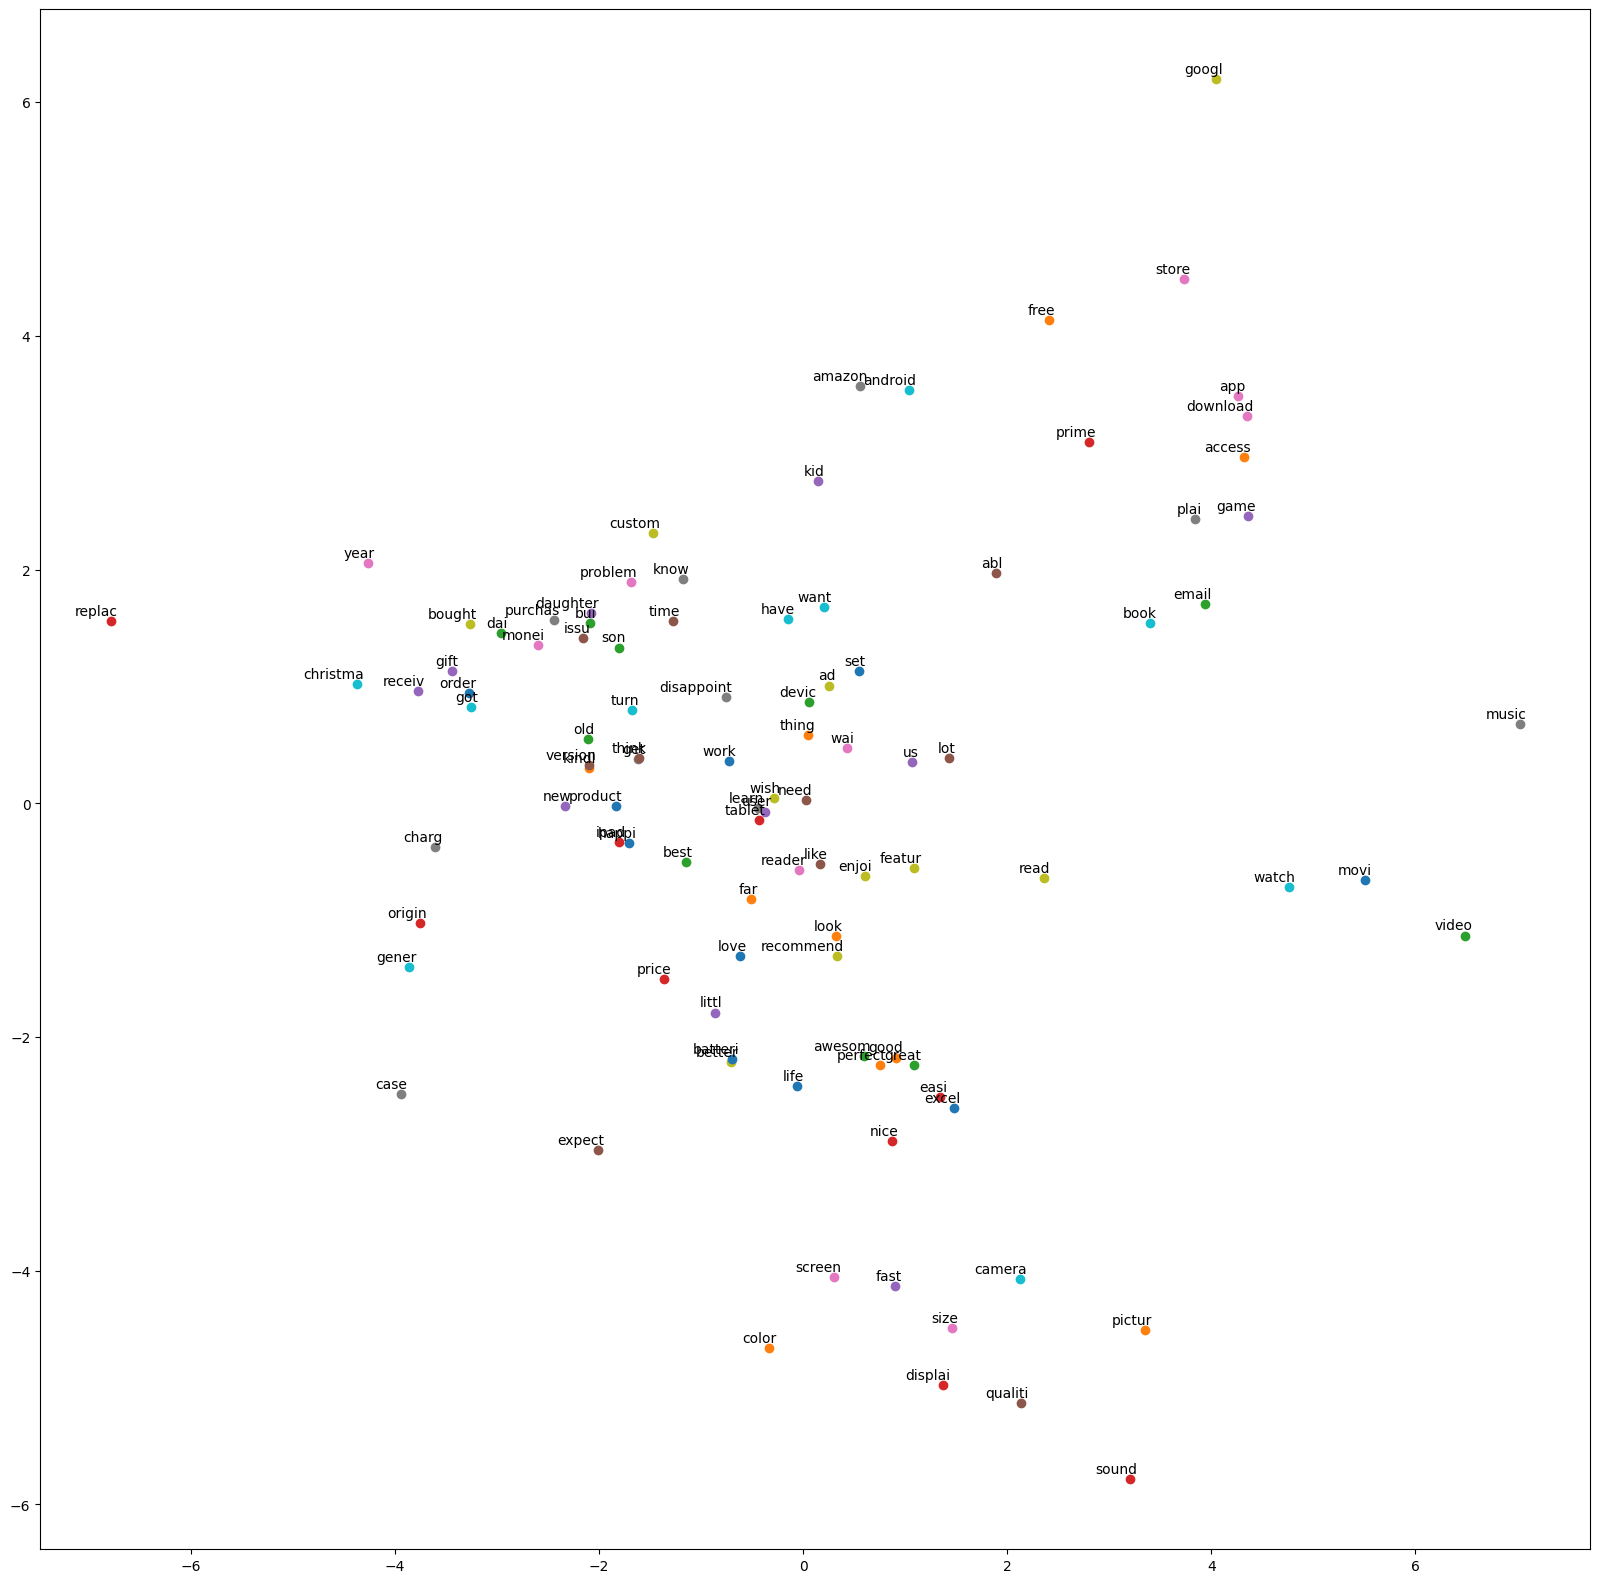

In [11]:
# Write your code here
!pip install gensim
import pandas as pd
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import preprocess_string

# Step 1: Load your dataset
df = pd.read_csv('Product.csv')
documents = df['review_body'].dropna().tolist()

# Step 2: Preprocess the documents
# Here we're using Gensim's preprocess_string, but you might need more preprocessing depending on your data
processed_docs = [preprocess_string(doc) for doc in documents]

# Step 3: Train the Word2Vec model
model = Word2Vec(sentences=processed_docs, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_model_300d.model")

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Choose words to visualize
words = list(model.wv.index_to_key)[:100]  # Adjust as needed
word_vectors = [model.wv[word] for word in words]

# Use PCA to reduce to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(20, 20))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [14]:
# The GitHub link of your final csv file

# Link:
" https://github.com/VinaykrishnaGudla/vinaykrishna_Gudla_031/blob/main/annotated_dataset%20(1).csv "



' https://github.com/VinaykrishnaGudla/vinaykrishna_Gudla_031/blob/main/annotated_dataset%20(1).csv '

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer


The assignment was cool but challenging, especially labeling the reviews. Making word models was fun, and there was enough time to complete everything.